In [1]:
%load_ext autoreload
%autoreload 1
%aimport modules.dataset_auxiliary, modules.classification_auxiliary, modules.ml_auxiliary, modules.tensor_module, modules.bullets, modules.preproc

/home/s.gostilovich/gesture_progect/gesture_classification/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
import os
import pickle
import modules.dataset_auxiliary as daux
from modules.dataset_auxiliary import *
from modules.classification_auxiliary import *
from modules.ml_auxiliary import *
from modules.tensor_module import *
from modules.bullets import *
from modules.preproc import *
import copy

# Tensors
import tntorch as tn
import tensorly as tl
from tensorly import random
from tensorly.decomposition import tucker, parafac, partial_tucker
from tensorly.tenalg import mode_dot, multi_mode_dot


# ML
# from sklearn.decomposition import PCA
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from IPython.display import clear_output

# import xgboost as xgb
# import pystmm


## Load initial ds_dict

In [3]:

# current version
file_path = r'backup/ds_dict.pkl'

# # save:
# with open(file_path, 'wb') as f:
#     pickle.dump(ds_dict, f)

# load:
with open(file_path, 'rb') as f:
    ds_dict = pickle.load(f)

check_ds_dict(ds_dict)
print()

True 	Info: 7468;   Skeleton: 7468;   Total: 7468



In [4]:
df = ds_dict['G101__trial1__left__call']['skeleton']
df.head(5)

,pose__0__x,pose__0__y,pose__0__z,pose__1__x,pose__1__y,pose__1__z,pose__2__x,pose__2__y,pose__2__z,pose__3__x,...,right_hand__17__z,right_hand__18__x,right_hand__18__y,right_hand__18__z,right_hand__19__x,right_hand__19__y,right_hand__19__z,right_hand__20__x,right_hand__20__y,right_hand__20__z
0,0.504566,0.483007,-0.419187,0.512195,0.468248,-0.393816,0.517451,0.468759,-0.394230,0.523402,...,0.001779,0.419982,0.874274,0.001036,0.426798,0.878431,0.001724,0.431595,0.878332,0.002642
1,0.505714,0.482927,-0.419194,0.512769,0.468184,-0.393802,0.518419,0.468713,-0.394216,0.524386,...,0.001621,0.420453,0.875529,0.001330,0.427345,0.879538,0.002506,0.432357,0.879545,0.003786
2,0.506588,0.482852,-0.431591,0.513260,0.468151,-0.406269,0.519245,0.468693,-0.406685,0.525111,...,0.001963,0.419988,0.874982,0.001869,0.426918,0.879153,0.003044,0.432110,0.879536,0.004282
3,0.507106,0.482764,-0.430026,0.513574,0.468106,-0.404846,0.519717,0.468653,-0.405261,0.525549,...,0.002475,0.419770,0.874797,0.002538,0.426700,0.878337,0.003782,0.431636,0.878009,0.005091
4,0.507399,0.482719,-0.437200,0.513772,0.468082,-0.412200,0.519957,0.468635,-0.412618,0.525805,...,0.002163,0.419992,0.875094,0.002145,0.426787,0.878402,0.003366,0.431563,0.877772,0.004613


## Selecting 

In [5]:
gestures = ['start', 'call', 'mute', 'pupil', 'high', 'select', 'unmute', 'close', 'yes', 'no', 'save']
# gestures += ['scroll_up', 'scroll_down', 'swipe_right', 'swipe_left', 'export'] 
# gestures += ['screenshot', 'writing', 'delete']
# gestures += ['moving_down', 'moving_left', 'moving_right', 'moving_up', 'moving_back', 'moving_forward']
# gestures += ['anticlockwise', 'clockwise', 'right_forward', 'left_forward']
# gestures += ['zoom_in_c', 'zoom_out_c', 'zoom_out_l', 'zoom_out_r', 'zoom_in_l',  'zoom_in_r']
# gestures += ['yes_head', 'no_head']

exp_cofig = "one hand gestures  | [x, y, z] | fill_na: {'method':ffill} | train: subs[5:], test: subs[:5]"

Selected  2812 samples. 4656(7468) was dropped!
14 samples was unvalid. Remain 2798(2812)


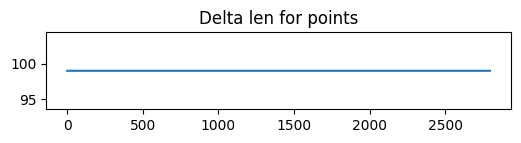

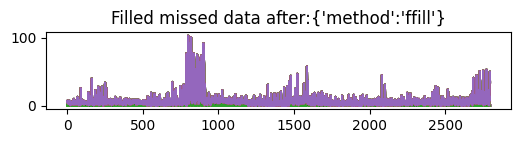

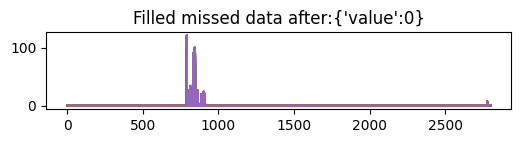

In [6]:
# preparing

subs = get_all_subs_from_ds_dict(ds_dict)
subs = subs[:]
# gestures = ['start', 'call', 'mute', 'pupil', 'high', 'select', 'unmute', 'close', 'yes', 'no', 'save']


data_dict_selected = select_g_ids(ds_dict, subs=subs, gestures=gestures)
data_dict_valid =  select_valid_samples(data_dict_selected)

# points 
COORDS = ['x', 'y', 'z']

# data_dict_points = select_points(data_dict_valid, coords=COORDS, hand_points=[])
data_dict_points = select_points(data_dict_valid, coords=COORDS, hand_points='def', pose_points='all')
plt.show()

# nan
# data_dict_filled = update_skeleton(data_dict_points, update_df_fill_na, {'value':0})
data_dict_filled_ = update_skeleton(data_dict_points, update_df_fill_na, {'method':'ffill'})
plt.title(f"Filled missed data after:{{'method':'ffill'}}")
plt.show()

data_dict_filled = update_skeleton(data_dict_filled_, update_df_fill_na, {'value':0})
# data_dict_filled = update_skeleton(data_dict_points, update_df_fill_na, {'method':'ffill'})
plt.title(f"Filled missed data after:{{'value':0}}")
plt.show()

# # data_dict_filled = data_dict_points



In [7]:
# cropping
data_dict_adjusted = data_dict_filled
data_dict_adjusted = update_skeleton(data_dict_adjusted, update_df_crop_time, show=False)

# additional preprocessing
# data_dict_adjusted = update_skeleton(data_dict_adjusted, update_df_to_speed, show=True)
# data_dict_adjusted = update_skeleton(data_dict_adjusted, update_df_to_coord_and_speed, show=True)





#train
print('Train')
data_dict = select_g_ids(data_dict_adjusted, subs=subs[5:])
data_dict, label_dict = form_gesture_labels(data_dict)
samples_list,  labels_list = form_samples_labels_lists(data_dict)
data_tensor = np.concatenate(samples_list, axis=0)

#test 
print('Test')
data_dict_test = select_g_ids(data_dict_adjusted, subs=subs[:5])
# data_dict_test, label_dict_test = form_gesture_labels(data_dict_test)
data_dict_test, label_dict_test = form_gesture_labels(data_dict_test, label_dict=label_dict)
samples_list_test,  labels_list_test = form_samples_labels_lists(data_dict_test)
data_tensor_test = np.concatenate(samples_list_test, axis=0)

Train
Selected  2141 samples. 657(2798) was dropped!
Test
Selected  657 samples. 2141(2798) was dropped!


## Tensor preprocessing

In [8]:
data_tensor_ = data_tensor.reshape(data_tensor.shape[:2] + (-1, len(COORDS)))
data_tensor_test_ = data_tensor_test.reshape(data_tensor_test.shape[:2] + (-1, len(COORDS)))

In [9]:
skeleton_2d = data_tensor_[:,:,:, :]
print(skeleton_2d.shape)

(2141, 120, 75, 3)


In [200]:

# def convert_to_relative_coords()

    
joint_dim = 2

skeleton = np.swapaxes(skeleton_2d, joint_dim,  0)

se_pose_joints = [0, 32]  # will be used as se_pose_joints[0]:se_pose_joints[1]+1
origin= 'hop'
# origin= 'shoulder'
good_origins = ['hop', 'h', 'shoulder', 's']
assert origin in good_origins, f"Error! origin={origin}, should be in {good_origins}"

XYZ_ = skeleton[se_pose_joints[0]:se_pose_joints[1]+1]
N, LS, RS, LH, RH = [np.swapaxes(XYZ_[i:i+1],  joint_dim, 0)  for i in [0, 11, 12, 23, 24]]
MS, MH = (LS + RS)/2, (LH + RH)/2

if origin in ['hop', 'h']:  
    O_new = MH
elif origin in ['shoulder', 's']:
    O_new = MS
else:
    assert 0, f'Error! The actions for origin={origin} is not defined!'
    
XYZ = np.swapaxes(XYZ_,  joint_dim, 0)

XYZ = XYZ - O_new
XYZ[:, :, :, 2] *= 1
 

Lx = (((LS - RS)**2).sum(axis=-1, keepdims=True)**0.5)/2
Ly = (((MS - MH)**2).sum(axis=-1, keepdims=True)**0.5)

Ex = (LH - MH)
Ey_ = (MS - MH)
# Ey_[:, :, :, 0] = 0
# Ey_[:, :, :, 1] = 0
# Ey_[:, :, :, 2] = 1
# Ey = Ey_
Ez = np.cross(Ex, Ey_, axis=-1)
Ey = np.cross(Ez, Ex, axis=-1)


# Ex = Ex * Lx / np.linalg.norm(Ex, axis=-1, keepdims=True)
# Ey = Ey * Lx / np.linalg.norm(Ey, axis=-1, keepdims=True)
# Ez = Ez * Lx / np.linalg.norm(Ez, axis=-1, keepdims=True)


Ex = Ex * 1 / np.linalg.norm(Ex, axis=-1, keepdims=True)
Ey = Ey * 1 / np.linalg.norm(Ey, axis=-1, keepdims=True)
Ez = Ez * 1 / np.linalg.norm(Ez, axis=-1, keepdims=True)



# Chenging cooordinate system

# 1) Shifting the origin:
XYZ_new = XYZ


# 2) changing the coordinates
Pa_b_t_ = np.stack([Ex, Ey, Ez], axis=-1)
Pb_a_t_ = np.linalg.inv(Pa_b_t_)

Pb_a_t = np.repeat(Pb_a_t_, repeats=XYZ_new.shape[joint_dim], axis=joint_dim)

# # XYZ_new = np.swapaxes(XYZ_new, joint_dim,  0)
# for i in range(XYZ_new.shape[0]):
#     XYZ_new[i] = np.matmul(Pb_a_t[i], XYZ_new[i], (-1, -1))
XYZ_new =  np.matmul(Pb_a_t, np.expand_dims(XYZ_new, axis=-1) )
XYZ_new = XYZ_new.squeeze(-1)

XYZ_new_ = np.swapaxes(XYZ_new, joint_dim, 0)
N_new, LS_new, RS_new, LH_new, RH_new = [np.swapaxes(XYZ_new_[i:i+1],  joint_dim, 0)  for i in [0, 11, 12, 23, 24]]
MS_new, MH_new = (LS_new + RS_new)/2, (LH_new + RH_new)/2

In [126]:
Ey.T.shape

(3, 1, 120, 2141)

In [127]:
Ey.shape

(2141, 120, 1, 3)

In [128]:
# points_list = [[a, b] for a, b in zip([N, LS, RS, LH, RH, MS, MH ],[N_new, LS_new, RS_new, LH_new, RH_new, MS_new, MH_new])]

# for points, name in zip(points_list, ['N', 'LS', 'RS', 'LH', 'RH', 'MS', 'MH' ]):
#     print(name, np.around(points[0], 15), np.around(points[1], 15))# 

In [188]:
# import chart_studio.plotly as py
# import chart_studio
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

pio.renderers.default = 'notebook_connected'
# chart_studio.tools.set_credentials_file(username='sergei.gostilovich', api_key='YliSiRuBqa7AoASKM44J')

In [189]:
pose_tensor = XYZ[14] #- O_new[14]
pose_tensor = np.transpose(pose_tensor, [2, 0, 1])
pose_tensor_1 = pose_tensor
data = []
data += gen_pose_plot_data(pose_tensor, 30, common_color=None)


fig = go.Figure(data=data)
fig

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#     #  scene = dict(
#     #     xaxis = dict(range=[-2,2],),
#     #     yaxis = dict(range=[-2,2],),
#     #     zaxis = dict(range=[-2,2],),),
# )

# fig.update_layout(
#     autosize=False,
#     width=500,
#     height=500,
#      scene = dict(
#         xaxis = dict(range=[-1, 0],),
#         yaxis = dict(range=[-1.5, 0],),
#         zaxis = dict(range=[-0.5, 0.5],),),
# )

In [201]:
pose_tensor = np.transpose(XYZ_new[14], [2, 0, 1])
# pose_tensor_2 = pose_tensor
pose_tensor_3 = pose_tensor
data = []
data += gen_pose_plot_data(pose_tensor, 35, common_color=None)


fig = go.Figure(data=data)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
     scene = dict(
        xaxis = dict(range=[-0.2,0.3],),
        yaxis = dict(range=[-0.4, 0.5],),
        zaxis = dict(range=[-0.4, 0.7],),),
)
fig

In [205]:
point = 11

Text(0.5, 1.0, 'X')

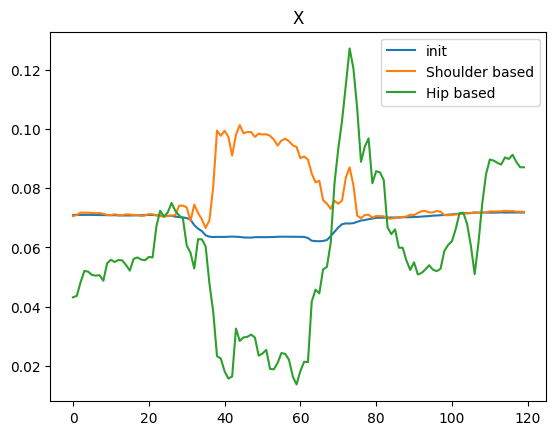

In [213]:
plt.plot(pose_tensor_1[0, :, point:point+1], label='init')
plt.plot(pose_tensor_2[0, :, point:point+1], label='Shoulder based')
plt.plot(pose_tensor_3[0, :, point:point+1], label='Hip based')
plt.legend()
plt.title('X')

Text(0.5, 1.0, 'Y')

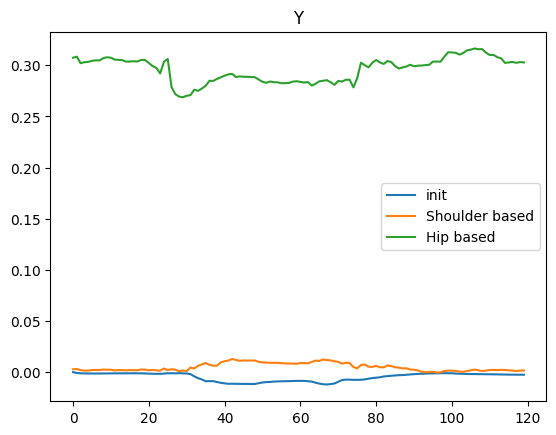

In [214]:
plt.plot(pose_tensor_1[1, :, point:point+1], label='init')
plt.plot(pose_tensor_2[1, :, point:point+1], label='Shoulder based')
plt.plot(pose_tensor_3[1, :, point:point+1], label='Hip based')
plt.legend()
plt.title('Y')

Text(0.5, 1.0, 'Z')

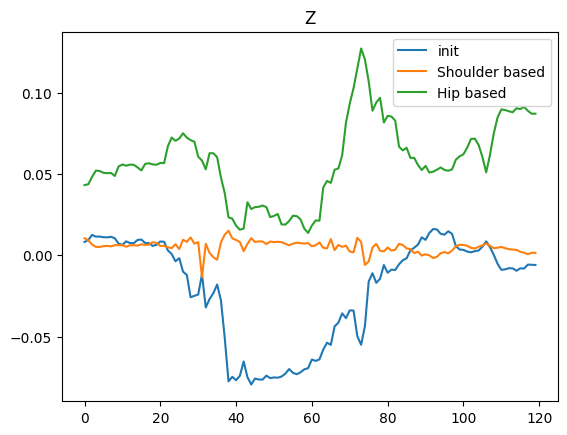

In [215]:
plt.plot(pose_tensor_1[2, :, point:point+1], label='init')
plt.plot(pose_tensor_2[2, :, point:point+1], label='Shoulder based')
plt.plot(pose_tensor_3[0, :, point:point+1], label='Hip based')
plt.legend()
plt.title('Z')

In [20]:
MH_.shape

(1, 3)

In [22]:
O_new.shape

(2141, 120, 1, 3)

Text(0.5, 1.0, 'Inisial body')

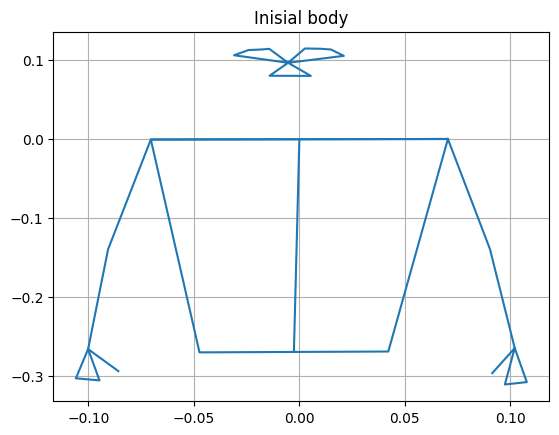

In [21]:
XYZ_ = XYZ[0, 0, :, :] - O_new[0, 0, :, :]
MS_, MH_ = (MS - O_new)[0, 0, 0, :], (MH - O_new)[0, 0, 0, :]
plt.plot(XYZ_[BOXBODY_LINE_POINTS, 0], -XYZ_[BOXBODY_LINE_POINTS, 1], color='#1f77b4')
plt.plot(XYZ_[FACE_LINE_POINTS, 0], -XYZ_[FACE_LINE_POINTS, 1], color='#1f77b4')
# plt.plot(XYZ_[LEGS_LINE_POINTS, 0], -XYZ_[LEGS_LINE_POINTS, 1], color='#1f77b4')
plt.plot(XYZ_[HANDS_LINE_POINTS, 0], -XYZ_[HANDS_LINE_POINTS, 1], color='#1f77b4')
# plt.plot(XYZ_[BOXBODY_LINE_POINTS, 0], -XYZ_[BOXBODY_LINE_POINTS, 1])
# plt.plot(XYZ_[BOXBODY_LINE_POINTS, 0], -XYZ_[BOXBODY_LINE_POINTS, 1])
plt.plot([MS_[0], MH_[0]], [-MS_[1], -MH_[1]])
plt.grid()
plt.title(f"Inisial body")


In [57]:
MS_new.shape

(2141, 120, 1, 3)

Text(0.5, 1.0, 'After scaling with origin= shoulder')

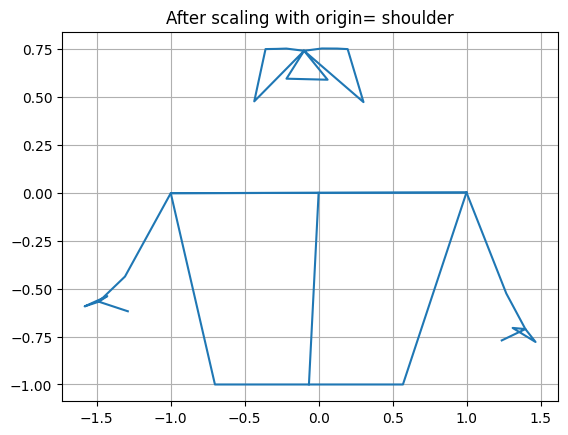

In [58]:
XYZ_ = XYZ_new[0, 0, :, :] 
MS_, MH_ = MS_new[0, 0, 0, :], MH_new[0, 0, 0, :]
plt.plot(XYZ_[BOXBODY_LINE_POINTS, 0], XYZ_[BOXBODY_LINE_POINTS, 1], color='#1f77b4')
plt.plot(XYZ_[FACE_LINE_POINTS, 0], XYZ_[FACE_LINE_POINTS, 1], color='#1f77b4')
# plt.plot(XYZ_[LEGS_LINE_POINTS, 0], XYZ_[LEGS_LINE_POINTS, 1], color='#1f77b4')
plt.plot(XYZ_[HANDS_LINE_POINTS, 0], XYZ_[HANDS_LINE_POINTS, 1], color='#1f77b4')

plt.plot([MS_[0], MH_[0]], [MS_[1], MH_[1]])
plt.grid()
plt.title(f"After scaling with origin= {origin}")


In [74]:
0.06547187 + 

array([ 0.50519413,  0.39869109, -0.4410131 ])

In [37]:
skeleton[0]

array([ 0.50519413,  0.39869109, -0.4410131 ])

In [13]:
data = data_tensor_[0:1,:,:, :]

In [14]:
data.shape

(1, 120, 67, 2)

In [15]:
skeleton = data_tensor_[0,0,:, :]

In [16]:
skeleton.shape

(67, 2)

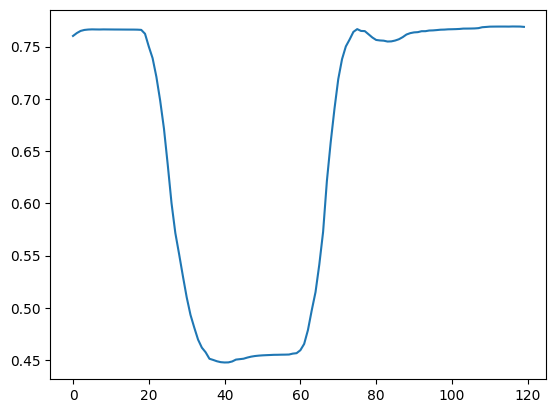

In [12]:
plt.plot(data_tensor_[0,:,15, 1])